## In the below workbook we will be time forecasting using ARIMA and SARIMA MODELS

### we will beto use either model either the sarima or the  learning when arima model (Autoregressive Integrated Moving Average) 

we will be predicting the sales of an industy for the year 2021   we will ben using  bothe the arima and sarimax models and comprare in what sitiuations should we use any of the above models . 

In [2]:
# we will start by importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
df=pd.read_csv('news.csv')

In [4]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [5]:
df.isnull().sum()

Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [6]:


# calculate the median values for age, revenue, and salary
median_values = {'Revenue': df['Revenue'].median(), 'Sales_quantity': df['Sales_quantity'].median(), 'Average_cost': df['Average_cost'].median(),'The_average_annual_payroll_of_the_region':df['The_average_annual_payroll_of_the_region'].median()}

# fill the missing values in the specified columns with their median values
df.fillna(value=median_values, inplace=True)


In [7]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,9.600000e+01,96.000000,96.000000,9.600000e+01
mean,3.227059e+07,18920.916667,1681.507372,2.852650e+07
std,9.481058e+06,5381.951977,242.500825,8.920511e+05
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.853894e+07,16702.750000,1605.548321,2.810553e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.587175e+07,20525.250000,1759.132711,2.925338e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [8]:
df.shape

(96, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   96 non-null     float64
 2   Sales_quantity                            96 non-null     float64
 3   Average_cost                              96 non-null     float64
 4   The_average_annual_payroll_of_the_region  96 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [11]:
# Use pandas to_datetime to convert the 'periods' column to a datetime object
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')

# Filter out rows where the year is 2020, 2021 or 2022
df = df[(df['Period'].dt.year != 2020) & (df['Period'].dt.year != 2021) & (df['Period'].dt.year != 2022)]

In [12]:

# we will be dropping all the other columns and will be only left with the target column
df = df.drop(columns=['Revenue', 'The_average_annual_payroll_of_the_region','Average_cost'])

# Show the updated dataframe
print(df.head())

      Period  Sales_quantity
0 2015-01-01         12729.0
1 2015-02-01         11636.0
2 2015-03-01         15922.0
3 2015-04-01         15227.0
4 2015-05-01          8620.0


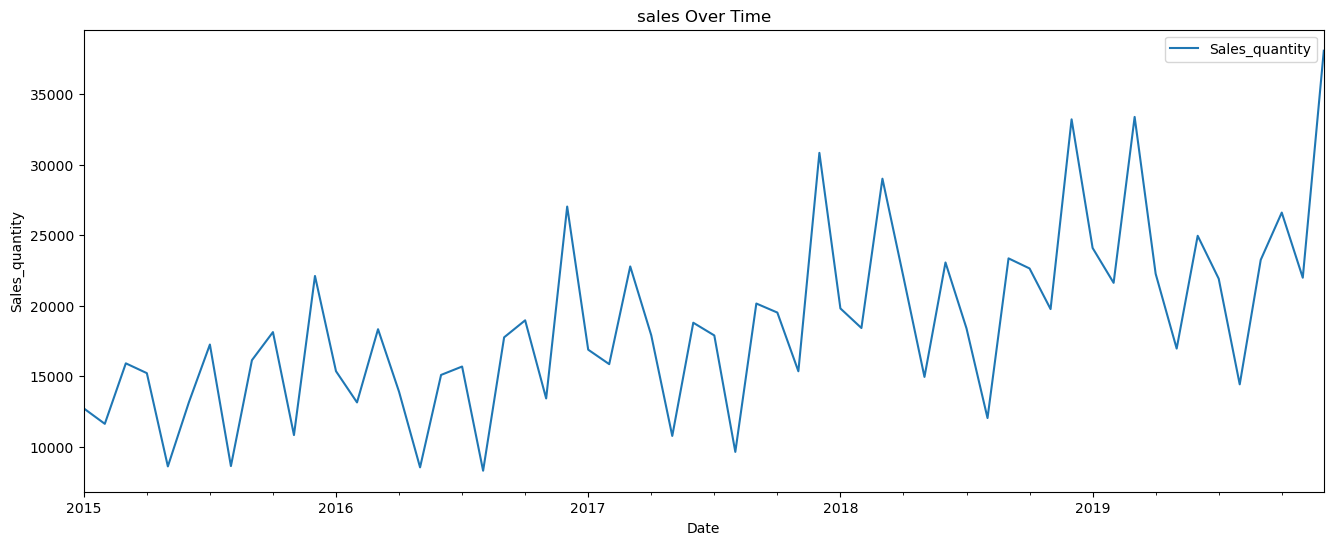

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x='Period', y='Sales_quantity', kind='line', figsize=(16,6))
plt.title('sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales_quantity')
plt.show()


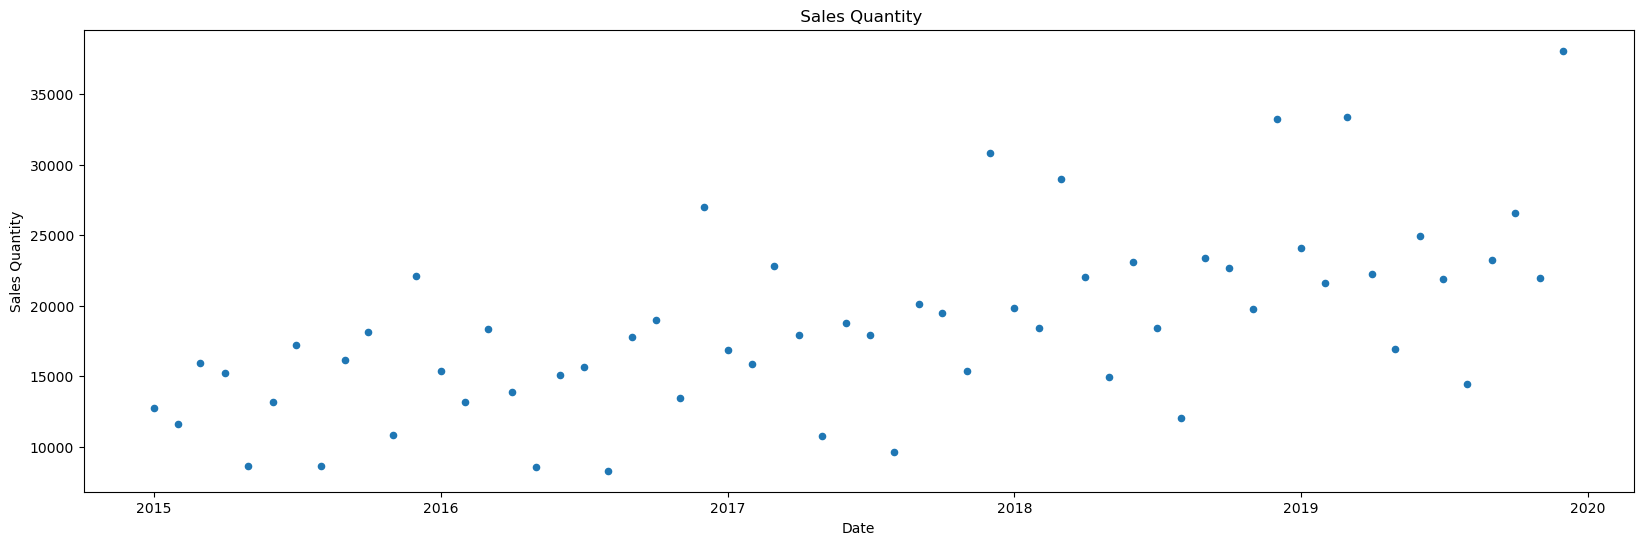

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x='Period', y='Sales_quantity', kind='scatter', figsize=(20,6))
plt.title(' Sales Quantity')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()


In [15]:

# Convert the Date column to datetime format
df['Period'] = pd.to_datetime(df['Period'])

# Set the Date column as the index of the DataFrame
df.set_index('Period', inplace=True)


# Group the data by year
year_groups = df.groupby(pd.Grouper(freq='A'))

# Calculate the mean for each year
year_means = year_groups.mean()

# Print the yearly means
print(year_means)


            Sales_quantity
Period                    
2015-12-31    14201.916667
2016-12-31    15468.666667
2017-12-31    18037.000000
2018-12-31    21392.916667
2019-12-31    24129.083333


In [16]:
# Use pandas grouper to group values using annual frequency
year_groups = df.groupby(pd.Grouper(freq ='A'))

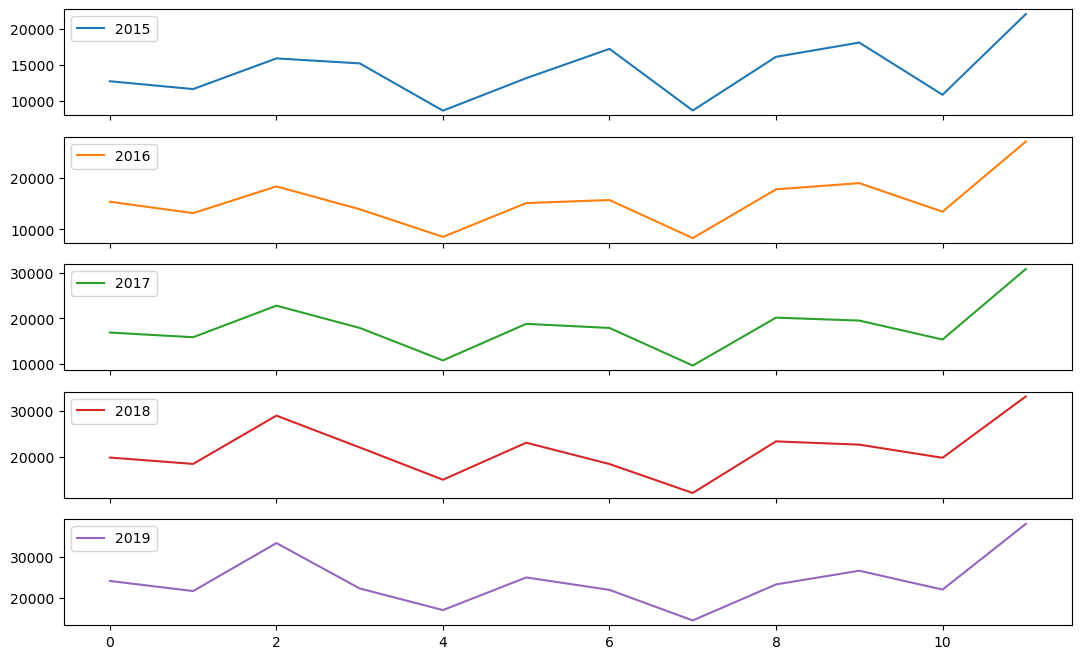

In [17]:
# Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()
for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()    
# Plot the yearly groups as subplots
nyse_annual.plot(figsize = (13,8), subplots=True, legend=True);

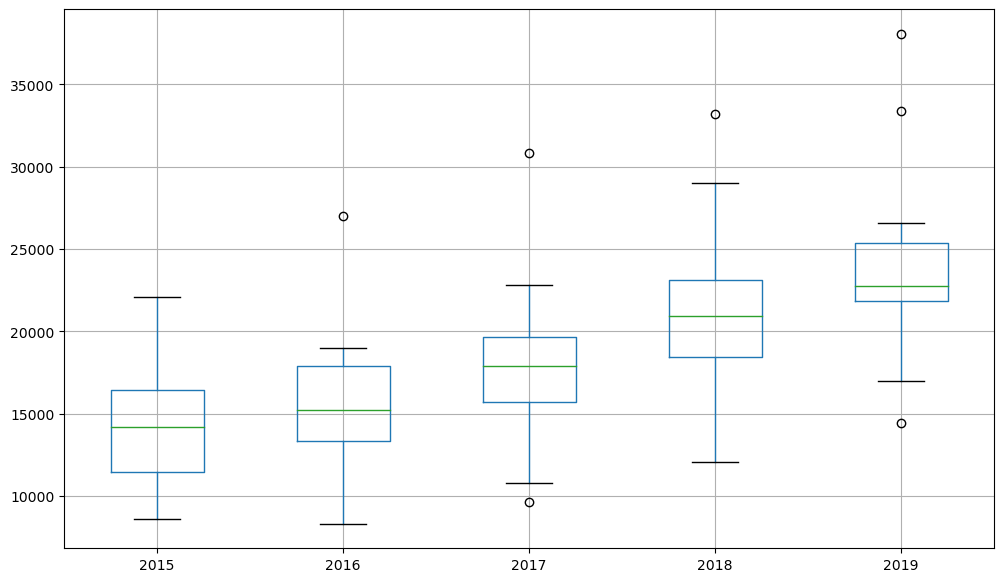

In [19]:
# Generate a box and whiskers plot for nyse_annual
nyse_annual.boxplot(figsize = (12,7));

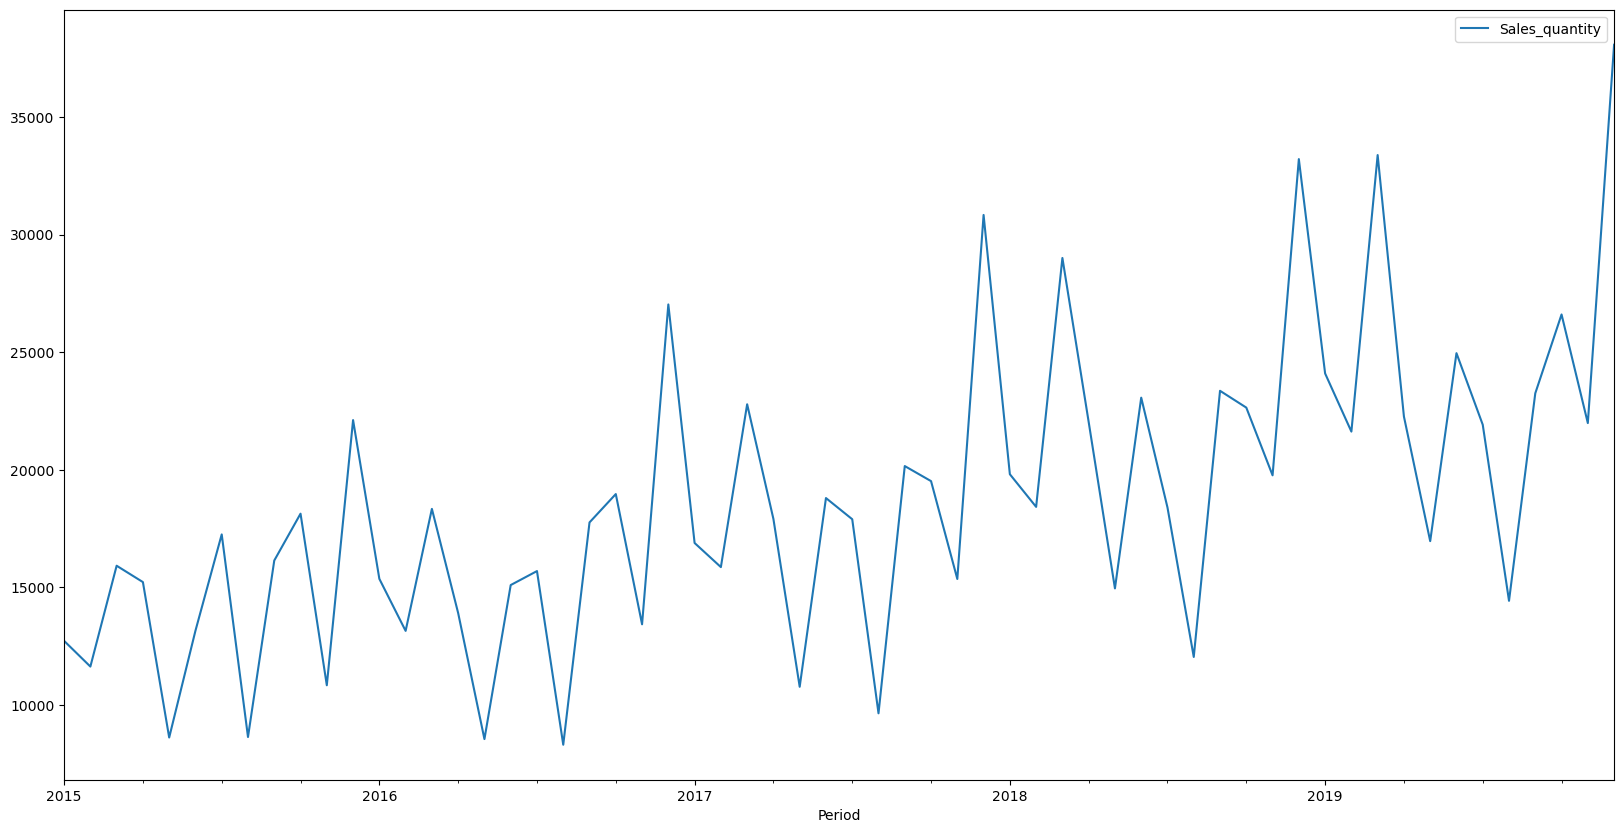

In [20]:
# Plot all years on the same graph
df.plot(figsize = (20,10),subplots=False, legend=True);

In [21]:
roll_mean = df.rolling(window=8, center=False).mean()
roll_std = df.rolling(window=8, center=False).std()

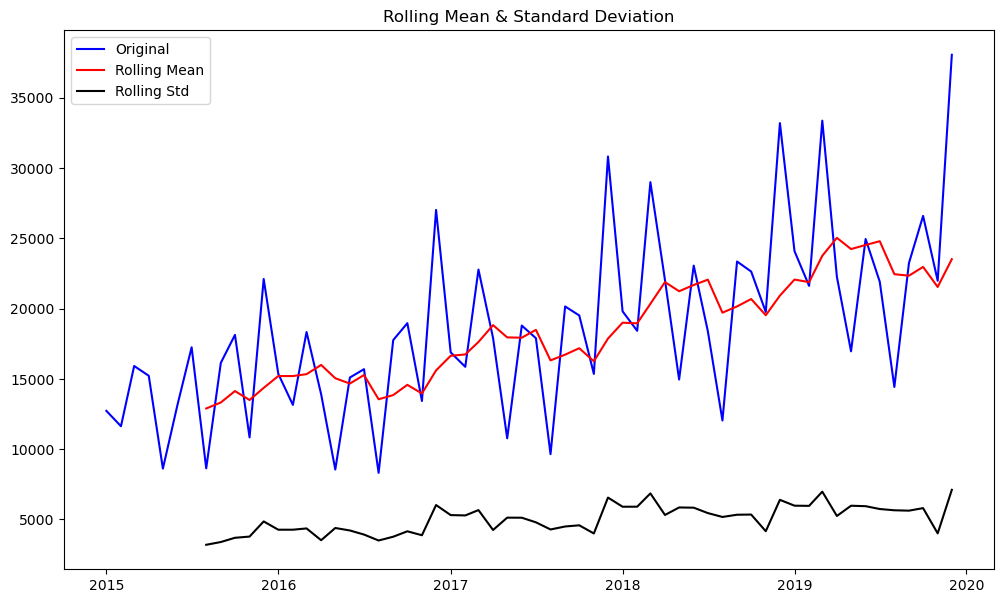

In [22]:
fig = plt.figure(figsize=(12,7))
plt.plot(df, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# in the below code we will be looking whether  our data is stationery or our data is seasonal

In [131]:
df['Period'] = pd.to_datetime(df['Period'], format='%Y-%m-%d')
df.set_index('Period', inplace=True)
df = df.asfreq('30D', method='ffill') # fill missing values with the last valid observation


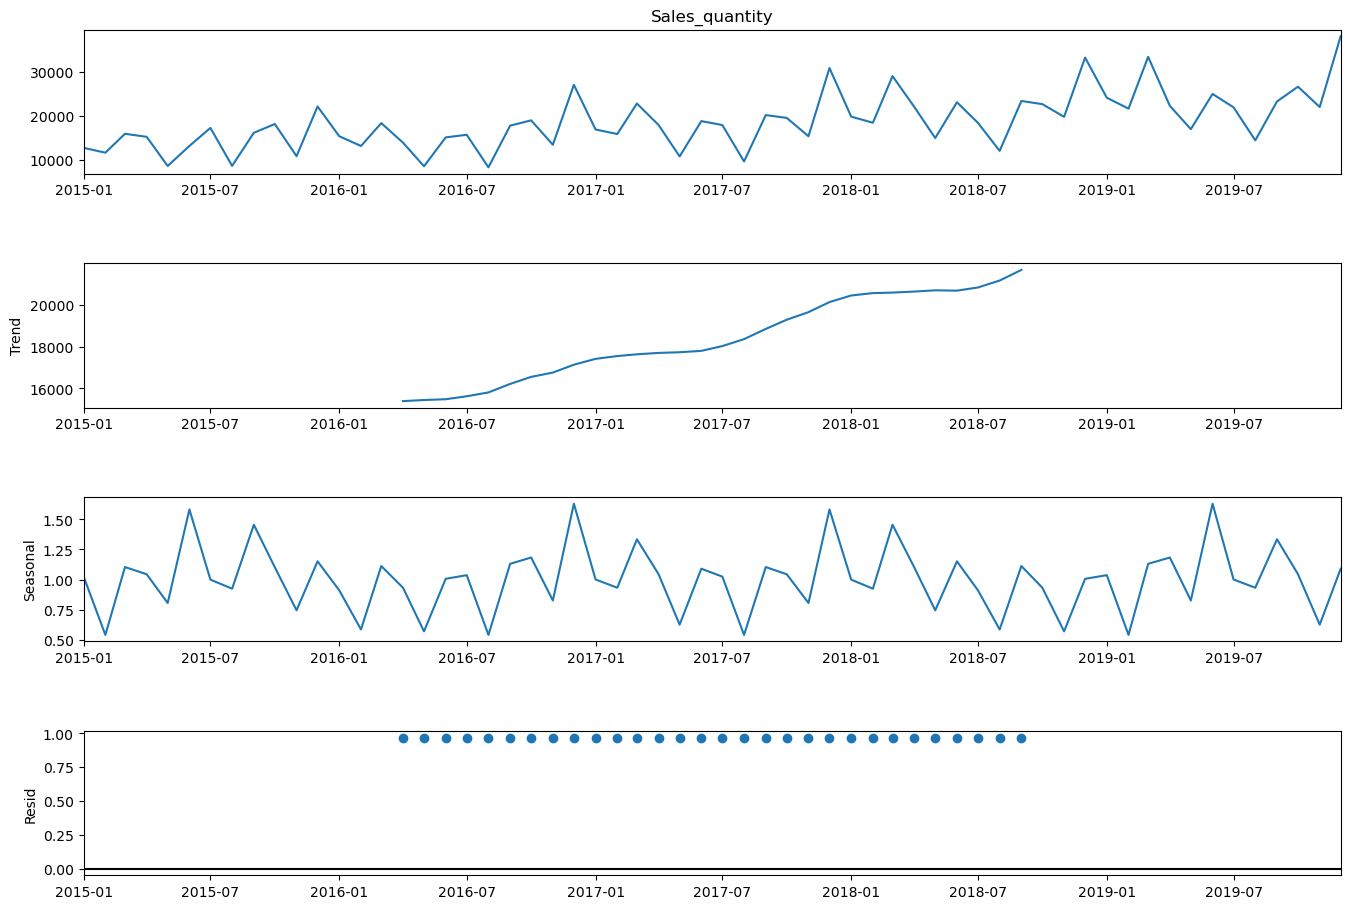

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Sales_quantity"], model='multiplicative', period=30)
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()


After the plotting of the above data we can clearly see that our data is seasonal . After knowing this we can decide on which model to use whether its SARIMAX OR ARIMA. If our data is seasonal we use SARIMAX and if its stationery we use ARIMA .

Since we have already come to a conclusion that our data is seasonal  and that we shall be adopting a sarimax model then we willstart figuring out the parameters to use to build the model .
we need the  p,d q values in order to build this  model(SARIMAX /ARIMA) 

We will start by figuring out our d value. The value od d is either 0 or 1 if the data is stationery we should use 0 and if the data is seasonal we should use 1

In the below line of code we will be looking for the value of p the value of p we would simply put it as  after which line do we see our plotted line distend and have the biggest change in the curve . we look at that line and after we see it then we can actually determine the value of p

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

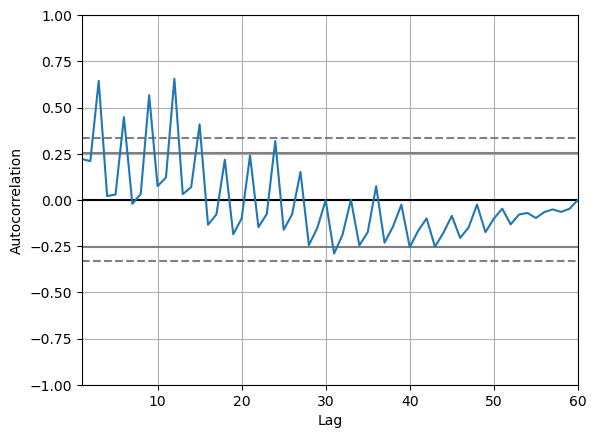

In [25]:
pd.plotting.autocorrelation_plot(df["Sales_quantity"])

In the below code we will be looking for the value of q(moving average).in the below plots we find the correlation and that why the first figure plotted will always coincide with 1and thus to find q we look at where from the first plot do we start risig againand its quite clear we start rising from the third plot and thus  our q is eqal to 3

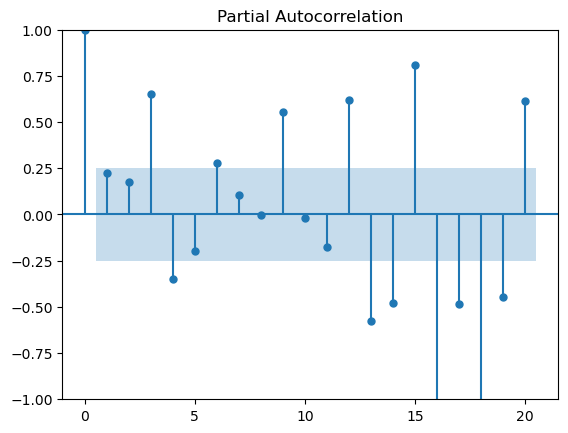

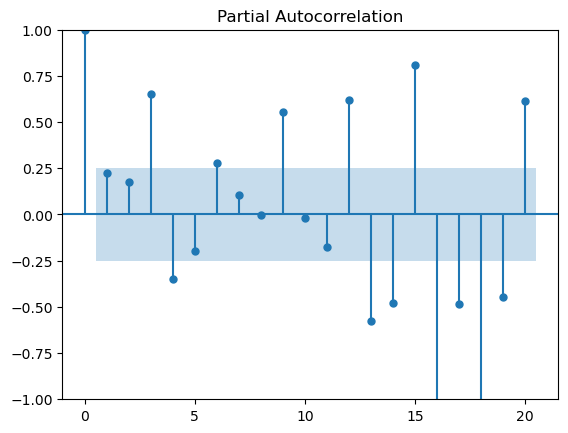

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Sales_quantity"], lags = 20)

In [37]:
from statsmodels.tsa.arima.model import ARIMA


In [39]:
p, d, q = 2, 1, 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Sales_quantity"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [48]:
p, d, q = 2, 1, 2
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df["Sales_quantity"], order=(p,d,q))
fitted = model.fit(disp=-1)
print(fitted.summary())



                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   60
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -568.935
Date:                Wed, 03 May 2023   AIC                           1147.870
Time:                        15:19:02   BIC                           1158.258
Sample:                    01-01-2015   HQIC                          1151.925
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9873      0.031    -32.204      0.000      -1.047      -0.927
ar.L2         -0.9768      0.019    -52.546      0.000      -1.013      -0.940
ma.L1          0.7321      0.112      6.527      0.0

As we said both arima and sarima would work on the data but lets see the effect of using a ARIMA MODEL on a stationery trend (keep in mind we should be using sarima model)

In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings('ignore')



# Define the p, d, and q parameters to take any value between 0 and 2
p, d, q = 2, 1, 2

# Fit the model
model = ARIMA(df["Sales_quantity"], order=(p,d,q))
fitted = model.fit()

# Make predictions
predictions = fitted.predict(start=len(df), end=len(df)+100)

print(predictions)


2020-01-01    31260.567562
2020-02-01    25624.257814
2020-03-01    37839.437042
2020-04-01    31284.308224
2020-05-01    25825.047172
                  ...     
2028-01-01    31619.569988
2028-02-01    29603.083256
2028-03-01    33560.337885
2028-04-01    31622.834207
2028-05-01    29670.488275
Freq: MS, Name: predicted_mean, Length: 101, dtype: float64


<AxesSubplot:xlabel='Period'>

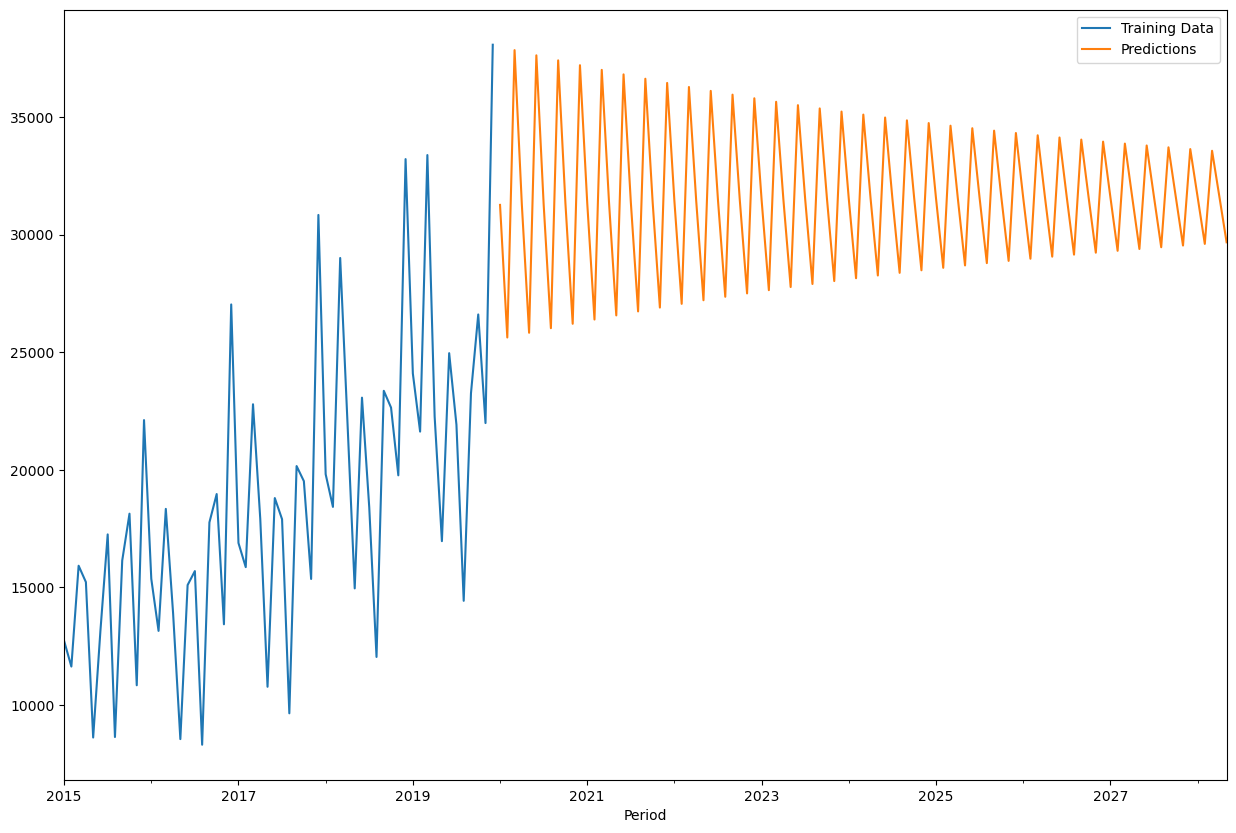

In [46]:
df["Sales_quantity"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

Its quite clear that our model is perfoming below expectation and thus using Arima model it would be very unwise

In the code below we will be now using the sarima model and we willbe qrouping the values and we  are using PDQ  and fixing the values to 1 to assume that for the whole year we have one pq and d and it repeats itself every 12 months

In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings('ignore')


# Define the p, d, and q parameters to take any value between 0 and 2
p, d, q = 2, 1, 2

# Define the seasonal p, d, and q parameters to take any value between 0 and 2
P, D, Q = 1, 1, 1
m = 12 # Monthly data

# Fit the model
model = SARIMAX(df['Sales_quantity'], order=(p, d, q), seasonal_order=(P, D, Q, m))
fitted = model.fit()

# Make predictions for the next 12 months
start_date = pd.to_datetime(df.index.max()) + pd.DateOffset(months=1)
end_date = start_date + pd.DateOffset(months=11)
predictions = fitted.predict(start=start_date, end=end_date)

print(predictions)


2020-01-01    28601.270417
2020-02-01    25241.547759
2020-03-01    38099.616639
2020-04-01    26838.052385
2020-05-01    20713.919024
2020-06-01    29702.220338
2020-07-01    26448.718060
2020-08-01    18292.869299
2020-09-01    28002.747694
2020-10-01    31070.490968
2020-11-01    25882.285966
2020-12-01    42603.981104
Freq: MS, Name: predicted_mean, dtype: float64


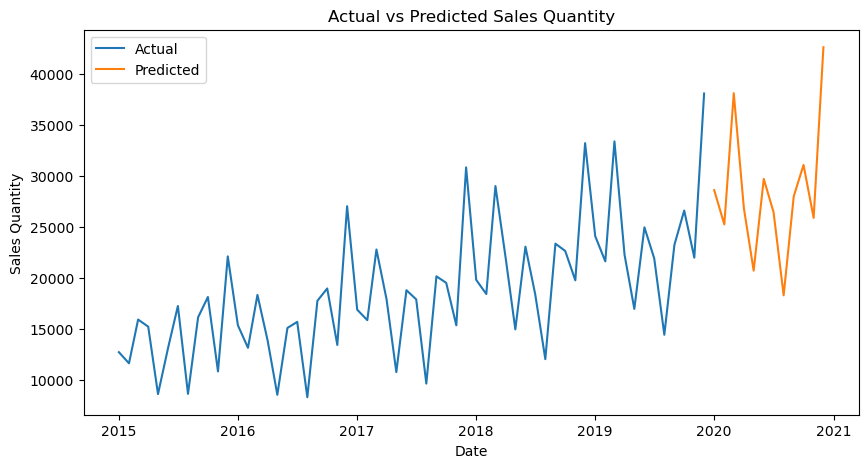

In [52]:


# Make predictions for the next 12 months
predictions = fitted.predict(start=len(df), end=len(df)+11, dynamic=True)

# Plot the actual and predicted sales
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Sales_quantity'], label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('Actual vs Predicted Sales Quantity')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()


this is how our final prediction looks like and in red is our predicted values for the year 2021